## (Conditional) normals

This notebooks aims to solve some small questiosn about normal distributions and their properties

In [17]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

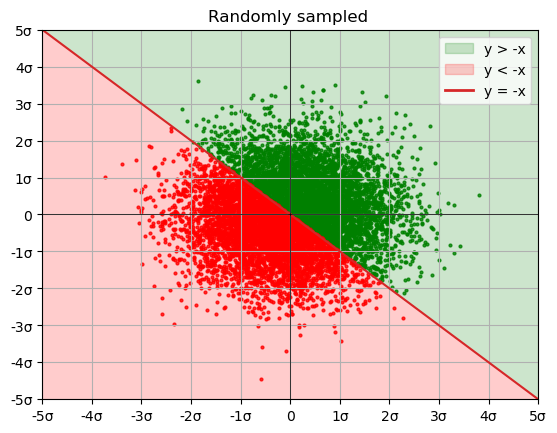

In [39]:
xx = np.linspace(-5, 5, 100)
yy = -xx
X, Y = np.meshgrid(xx, yy)
condition = Y > -X
fig, ax = plt.subplots()
contour = ax.contourf(X, Y, condition, levels=[-1, 0, 1], colors=["red", "green"], alpha=0.2)
ax.plot(xx, yy, color="tab:red", label="y = -x")
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ticks = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
tick_labels = [f"{i}σ" if i != 0 else "0" for i in ticks]
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels)
legend_elements = [
    Patch(facecolor='green', edgecolor='green', alpha=0.2, label='y > -x'),
    Patch(facecolor='red', edgecolor='red', alpha=0.2, label='y < -x'),
    plt.Line2D([0], [0], color='tab:red', lw=2, label='y = -x')
]
ax.legend(handles=legend_elements, loc='upper right')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(True)

np.random.seed(0)
n_samples = 10000
sample_x = np.random.normal(0, 1, n_samples)
sample_y = np.random.normal(0, 1, n_samples)
condition = sample_y > -sample_x
plt.scatter(sample_x[condition], sample_y[condition], s=4, color='green', alpha=0.8, label='y > -x')
plt.scatter(sample_x[~condition], sample_y[~condition], s=4, color='red', alpha=0.8, label='y < -x')

plt.title("Randomly sampled ")
plt.show()

In [40]:
condition_x_more_0 = (sample_x > 0) & (condition)
print(f"The probability of the sum positive is: {condition.sum()/n_samples}, vs true value of 0.5")
print(f"The probability of one being positive when sum positive is: {condition_x_more_0.sum() / condition.sum()} vs true value of 0.75")

The probability of the sum positive is: 0.4977, vs true value of 0.5
The probability of one being positive when sum positive is: 0.7444243520192887 vs true value of 0.75


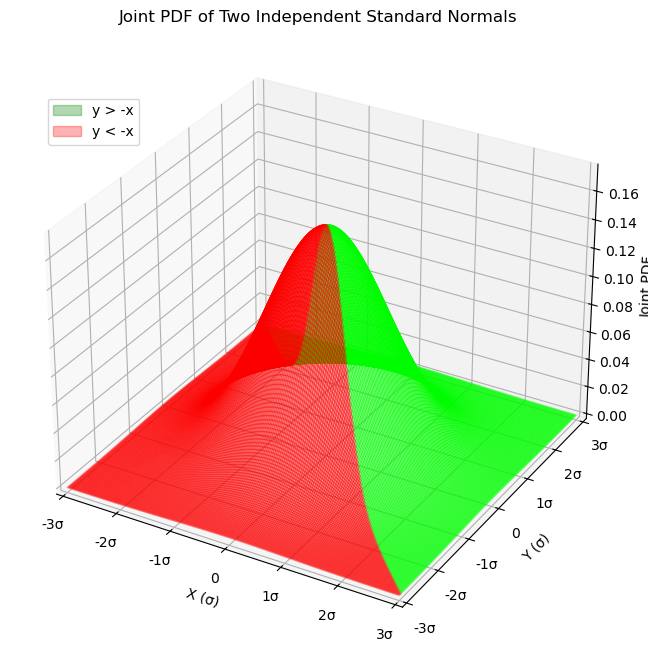

In [20]:
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)
Z = (1 / (2 * np.pi)) * np.exp(-0.5 * (X**2 + Y**2))
condition = Y > -X
colors = np.empty(X.shape + (4,), dtype=float)
colors[condition] = [0, 1, 0, 0.3]  # Green with alpha
colors[~condition] = [1, 0, 0, 0.3]  # Red with alpha
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, facecolors=colors, rstride=1, cstride=1, antialiased=True, shade=False)
ax.set_xlabel('X (σ)')
ax.set_ylabel('Y (σ)')
ax.set_zlabel('Joint PDF')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(0, np.max(Z) * 1.1)
ticks = [-3, -2, -1, 0, 1, 2, 3]
tick_labels = [f"{i}σ" if i != 0 else "0" for i in ticks]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(tick_labels)
ax.set_yticklabels(tick_labels)
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', edgecolor='green', alpha=0.3, label='y > -x'),
    Patch(facecolor='red', edgecolor='red', alpha=0.3, label='y < -x'),
]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.05, 0.9))
plt.title("Joint PDF of Two Independent Standard Normals")
plt.show()

Covariance of X and Y:
$$
r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}
         {\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}
$$

In [49]:
cov_matrix = np.cov(sample_x, sample_y)

print("Covariance matrix:")
print(f"{cov_matrix[0,0]:.4f}, {cov_matrix[0,1]:.4f}")
print(f"{cov_matrix[1,0]:.4f}, {cov_matrix[1,1]:.4f}")

Covariance matrix:
0.9754, -0.0076
-0.0076, 0.9863


What is the distribution of some conditional probabilities:

In [50]:
cov_matrix = np.cov(sample_x[condition], sample_y[condition])

print("Covariance matrix:")
print(f"{cov_matrix[0,0]:.4f}, {cov_matrix[0,1]:.4f}")
print(f"{cov_matrix[1,0]:.4f}, {cov_matrix[1,1]:.4f}")

Covariance matrix:
0.6818, -0.3331
-0.3331, 0.6905


In [64]:
def Comp_normal(data):
    plt.hist(data, bins=200, color="tab:blue", label="Conditional Distribution", density=True)
    mu, std = stats.norm.fit(data)
    x_vals = np.linspace(min(data), max(data), 300)
    pdf_vals = stats.norm.pdf(x_vals, mu, std)
    plt.plot(x_vals, pdf_vals, color="black", linewidth=2, label=f"Best-fit Normal\n$\mu={mu:.2f},\ \sigma={std:.2f}$")
    plt.vlines([mu, mu + std, mu - std], ymin=0, ymax=plt.ylim()[1], color='red', linestyle='--', label="Mean & $\pm 1 \sigma$")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title("QQ Plot")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

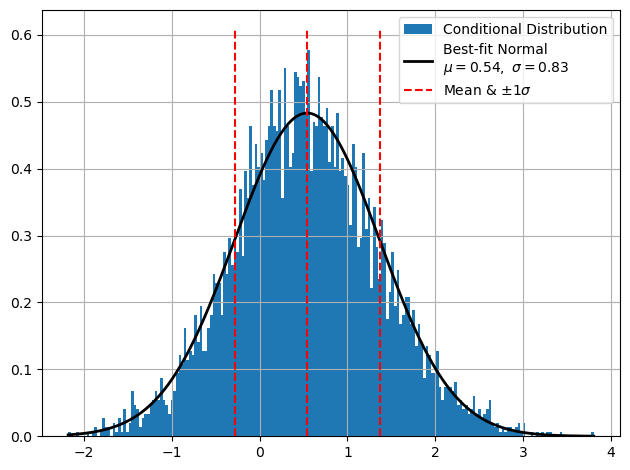

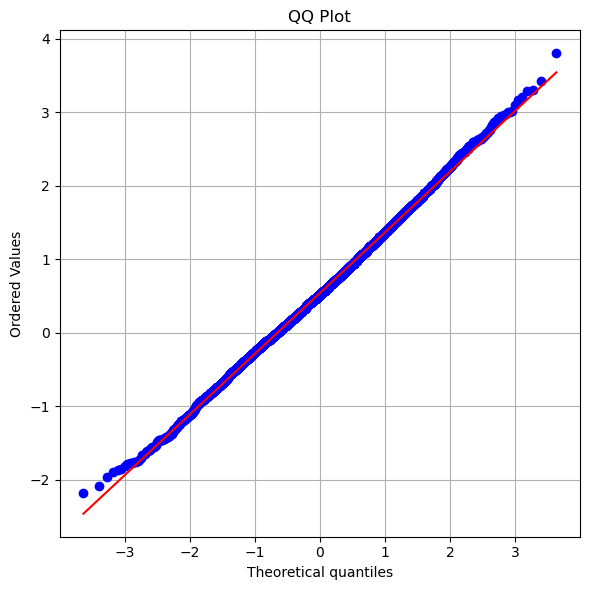

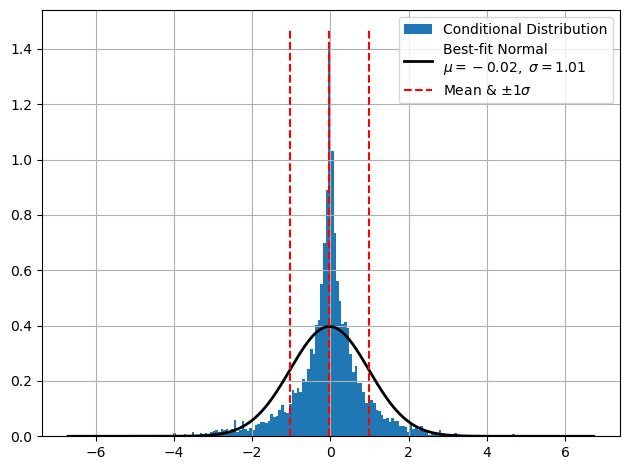

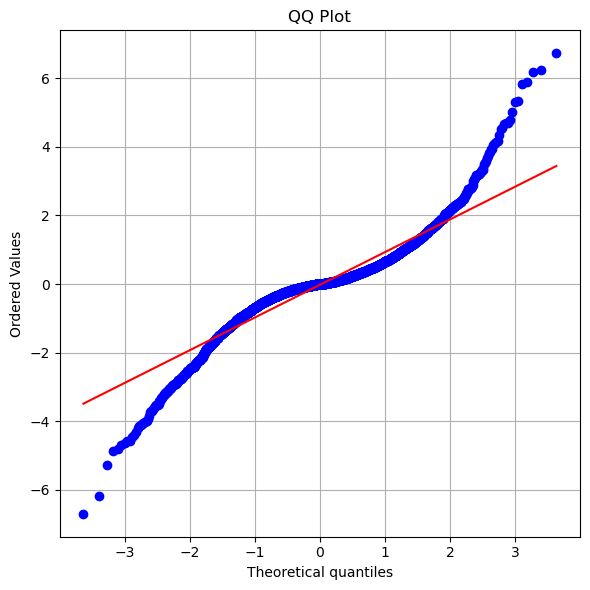

In [65]:
Comp_normal(sample_x[condition])
Comp_normal(sample_x[condition]*sample_y[condition])